# Математическая статистика
## Практическое задание 5

В данном задании предлагается провести некоторое исследование модели линейной регрессии и критериев для проверки статистических гипотез, в частности применить этим модели к реальным данным.

**Правила:**

* Выполненную работу нужно отправить на почту `probability.diht@yandex.ru`, указав тему письма `"[номер группы] Фамилия Имя - Задание 5"`. Квадратные скобки обязательны. Вместо `Фамилия Имя` нужно подставить свои фамилию и имя.
* Прислать нужно ноутбук и его pdf-версию. Названия файлов должны быть такими: `5.N.ipynb` и `5.N.pdf`, где `N` - ваш номер из таблицы с оценками.
* Никакой код из данного задания при проверке запускаться не будет.
* Некоторые задачи отмечены символом <font size="5" color="red">\*</font>. Эти задачи являются дополнительными. Успешное выполнение большей части таких задач (за все задания) является необходимым условием получения бонусного балла за практическую часть курса.
* Баллы за каждую задачу указаны далее. Если сумма баллов за задание меньше 25% (без учета доп. задач), то все задание оценивается в 0 баллов.


**Баллы за задание:**

* Задача 1 - 7 баллов
* Задача 2 - 2 балла
* Задача 3<font size="5" color="red">\*</font> - 3 балла
* Задача 4 - 2 балла
* Задача 5<font size="5" color="red">\*</font> - 10 баллов
* Задача 6 - 5 баллов
* Задача 7 - 4 балла
* Задача 8<font size="5" color="red">\*</font> - 4 балла
* Задача 9<font size="5" color="red">\*</font> - 10 баллов

## 1. Линейная регрессия

**Задача 1.** По шаблону напишите класс, реализующий линейную регрессию. Интерфейс этого класса в некоторой степени соответствует классу <a href="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression">`LinearRegression`</a> из библиотеки `sklearn`.

In [1]:
import numpy as np
import scipy.stats as sps
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import math
import tabulate
from IPython.display import HTML, display

In [2]:
# для задачи 7
остатки = []
# конец того, что отностися к задаче 7


class LinearRegression:
    def __init__(self):
        super()

    def fit(self, X, Y, alpha=0.95):
        """ Обучение модели. Предполагается модель Y = X * theta + epsilon, 
            где X --- регрессор, Y --- отклик,
            а epsilon имеет нормальное распределение с параметрами (0, sigma^2 * I_n).
            alpha --- уровень доверия для доверительного интервала.
        """

        self.n, self.k = X.shape

        self.inv_of_xt_dot_x = np.linalg.inv(X.T @ X)
        self.theta = self.inv_of_xt_dot_x @ X.T @ Y  # МНК-оценка
        self.sigma_sq = ((Y - X @ self.theta) ** 2).sum() / (self.n - self.k)  # несмещённая оценка для sigma^2
        self.conf_int = np.array([
            self.theta - np.sqrt(self.inv_of_xt_dot_x.diagonal() * self.sigma_sq) * sps.t(self.n - self.k).ppf((1 + alpha) / 2),
            self.theta - np.sqrt(self.inv_of_xt_dot_x.diagonal() * self.sigma_sq) * sps.t(self.n - self.k).ppf((1 - alpha) / 2)
        ]).T  # доверительные интервалы для коэффициентов (матрица размера k x 2)

        # для задачи 7
        остатки.append((Y - self.predict(X), self.sigma_sq))
        # конец того, что отностися к задаче 7

        return self

    def summary(self):
        print('Linear regression on %d features and %d examples' % (self.k, self.n))
        print('Sigma: %.6f' % self.sigma_sq)
        print('\t\tLower\t\tEstimation\tUpper')
        for j in range(self.k):
            print('theta_%d:\t%.6f\t%.6f\t%.6f' % (j + 1, self.conf_int[j, 0],
                                                   self.theta[j], self.conf_int[j, 1]))

    def predict(self, X):
        """ Возвращает предсказание отклика на новых объектах X. """

        Y_pred = X @ self.theta
        return Y_pred

Загрузите данные о потреблении мороженного в зависимости от температуры воздуха и цены (файл `ice_cream.txt`).
Примените реализованный выше класс линейной регрессии к этим данным предполагая, что модель имеет вид $ic = \theta_1 + \theta_2\ t$, где $t$ --- температура воздуха (столбец `temp`), $ic$ --- постребление мороженного в литрах на человека (столбец `IC`).
Значения температуры предварительно переведите из Фаренгейта в Цельсий [(Фаренгейт — 32) / 1,8 = Цельсий].

К обученной модели примените фунцию `summary` и постройте график регрессии, то есть график прямой $ic = \widehat{\theta}_1 + \widehat{\theta}_2\ t$, где $\widehat{\theta}_1, \widehat{\theta}_2$ --- МНК-оценки коэффициентов.
На график нанесите точки выборки.
Убедитесь, что построейнный график совпадает с графиком из презентации с первой лекции, правда, с точностью до значений температуры (она была неправильно переведена из Фаренгейта в Цельсий).

In [3]:
data = pd.read_csv('ice_cream.txt', delimiter='\t')
ic = data['IC'].values
temperature = data['temp'].values
temperature = (temperature - 32) / 1.8  # переводим из Фаренгейтов в Цельсии

n = len(temperature)
regressor = np.column_stack((np.ones(n), temperature))
linear_regression = LinearRegression().fit(regressor, ic)
linear_regression.summary()

Linear regression on 2 features and 30 examples
Sigma: 0.001786
		Lower		Estimation	Upper
theta_1:	0.283276	0.306298	0.329319
theta_2:	0.003831	0.005593	0.007355


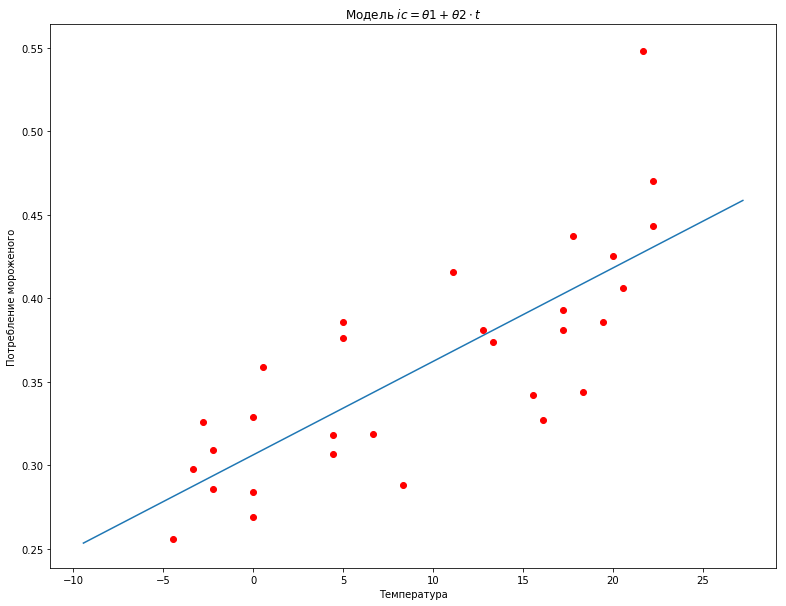

In [4]:
# график для модели ic = θ1 + θ2*t
plt.figure(figsize=(13, 10))
plt.ylabel('Потребление мороженого')
plt.xlabel('Температура')
temperature_grid = np.linspace(temperature.min() - 5, temperature.max() + 5)
temperature_grid_predict = linear_regression.predict(np.column_stack((np.ones_like(temperature_grid), temperature_grid)))
plt.plot(temperature_grid, temperature_grid_predict)
plt.scatter(temperature, ic, color='red')
plt.title(r'Модель $ic = θ1 + θ2 \cdot t$')
plt.show()

Теперь учтите влияние года (столбец `Year`) для двух случаев:
* модель $ic = \theta_1 + \theta_2\ t + \theta_3 y_1 + \theta_4 y_2$, где $y_1 = I\{1\ год\}, y_2 = I\{2\ год\}$. Поясните, почему нельзя рассмативать одну переменную $y$ --- номер года.
* для каждого года рассматривается своя линейная зависимость $ic = \theta_1 + \theta_2\ t$.

В каждом случае нарисуйте графики. Отличаются ли полученные результаты? От чего это зависит? Как зависит потребление мороженного от года? 

Нельзя рассмативать одну переменную $y$ --- номер года, потому что тогда добавка к потреблению в каком-нибудь одном году выражалась бы через добавки в других двух годах.

In [5]:
# модель ic = θ1 + θ2*t + θ3*y1 + θ4*y2
years = data['Year'].values
regressor = np.column_stack((np.ones(n), temperature, years == 1, years == 2))
linear_regression = LinearRegression().fit(regressor, ic)
linear_regression.summary()

Linear regression on 4 features and 30 examples
Sigma: 0.001016
		Lower		Estimation	Upper
theta_1:	0.251176	0.277050	0.302923
theta_2:	0.004741	0.006095	0.007449
theta_3:	-0.011237	0.016491	0.044218
theta_4:	0.041535	0.074307	0.107078


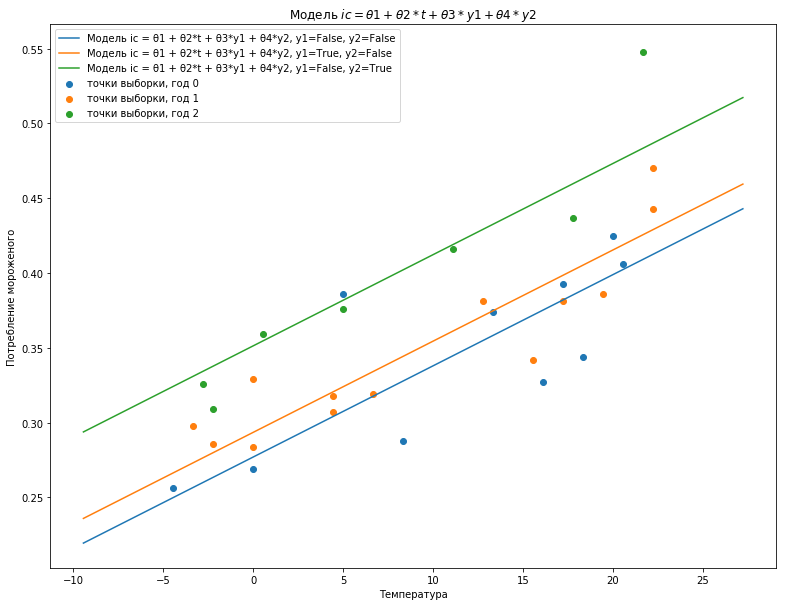

In [6]:
# график для модели ic = θ1 + θ2*t + θ3*y1 + θ4*y2
plt.figure(figsize=(13, 10))
plt.ylabel('Потребление мороженого')
plt.xlabel('Температура')
for year in range(3):
    temperature_grid = np.linspace(temperature.min() - 5, temperature.max() + 5)
    temperature_grid_predict = linear_regression.predict(np.column_stack(
        (np.ones_like(temperature_grid),
         temperature_grid,
         np.full_like(temperature_grid, year == 1),
         np.full_like(temperature_grid, year == 2))))
    plt.plot(temperature_grid, temperature_grid_predict,
             label='Модель ic = θ1 + θ2*t + θ3*y1 + θ4*y2, y1={}, y2={}'.format(year == 1, year == 2))
    indixes = years == year
    plt.scatter(temperature[indixes], ic[indixes], label='точки выборки, год {}'.format(year))
plt.title(r'Модель $ic = θ1 + θ2*t + θ3*y1 + θ4*y2$')
plt.legend()
plt.show()

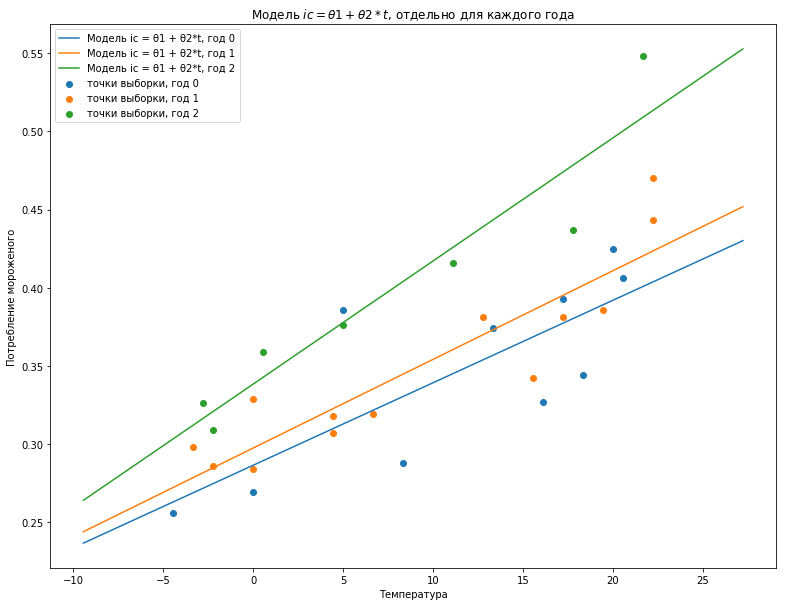

In [7]:
# модель ic = θ1 + θ2*t, отдельно для каждого года
plt.figure(figsize=(13, 10))
plt.ylabel('Потребление мороженого')
plt.xlabel('Температура')
for year in range(3):
    indixes = years == year
    temperature_year = temperature[indixes]
    ic_year = ic[indixes]

    regressor = np.column_stack((np.ones_like(temperature_year), temperature_year))
    linear_regression = LinearRegression().fit(regressor, ic_year)
    temperature_grid = np.linspace(temperature.min() - 5, temperature.max() + 5)
    temperature_grid_predict = linear_regression.predict(np.column_stack((np.ones_like(temperature_grid), temperature_grid)))
    plt.plot(temperature_grid, temperature_grid_predict, label='Модель ic = θ1 + θ2*t, год {}'.format(year))
    plt.scatter(temperature_year, ic_year, label='точки выборки, год {}'.format(year))
plt.title(r'Модель $ic = θ1 + θ2*t$, отдельно для каждого года')
plt.legend()
plt.show()

Да, отличаются. В модели с четырьмя параметрами графики регрессии для разных лет получаются друг их друга сдвигом, в модели с двумя параметрами (отдельно для каждого года) графики регрессии для разных лет дополнительно имеют разные коеффициенты наклона. Так происходит потому что в первом случае гарфики для каждого года имеют общее значение $\widehat\theta_2$, во втором случае же оно у них разное. В обоих случаях чем больше номер года, тем больше потребление.

Наконец, обучите модель на предсказание потребления мороженного в зависимости от всех переменных.
Не забудьте, что для года нужно ввести две переменных.
Для полученной модели выведите `summary`.

In [8]:
# модель ic = θ1 + θ2*t + θ3*y1 + θ4*y2 + θ5*price + θ6*income + θ7*lag_temp
price = data['price'].values
income = data['income'].values
lag_temp = data['Lag-temp'].values
regressor = np.column_stack(
    (np.ones_like(temperature),
     temperature,
     years == 1,
     years == 2,
     price,
     income,
     lag_temp))
linear_regression = LinearRegression().fit(regressor, ic)
linear_regression.summary()

Linear regression on 7 features and 30 examples
Sigma: 0.001024
		Lower		Estimation	Upper
theta_1:	0.107657	0.717753	1.327849
theta_2:	0.003801	0.005654	0.007507
theta_3:	-0.000852	0.038141	0.077134
theta_4:	0.045224	0.117733	0.190242
theta_5:	-2.467091	-0.659296	1.148500
theta_6:	-0.007774	-0.003231	0.001311
theta_7:	-0.000886	-0.000024	0.000838


**Интересное наблюдение:** МНК-оценка на $\theta_5$ получилась отрицательной, и это очень логично: чем больше стоимость мороженого, тем меньше его покупают.

Но это еще не все.
Постройте теперь линейную регрессию для модели $ic = \theta_1 + \theta_2\ t + \theta_3\ t^2 + \theta_4\ t^3$.
Выведите для нее summary и постройте график предсказания, то есть график кривой $ic = \widehat{\theta}_1 + \widehat{\theta}_2\ t + \widehat{\theta}_3\ t^2 + \widehat{\theta}_4\ t^3$. Хорошие ли получаются результаты?

In [9]:
# модель ic = θ1 + θ2*t + θ3*t**2 + θ3*t**3
regressor = np.column_stack(
    (np.ones_like(temperature),
     temperature,
     temperature ** 2,
     temperature ** 3))
linear_regression = LinearRegression().fit(regressor, ic)
linear_regression.summary()

Linear regression on 4 features and 30 examples
Sigma: 0.001529
		Lower		Estimation	Upper
theta_1:	0.295294	0.319902	0.344510
theta_2:	0.000388	0.007200	0.014013
theta_3:	-0.001861	-0.000855	0.000152
theta_4:	0.000002	0.000038	0.000073


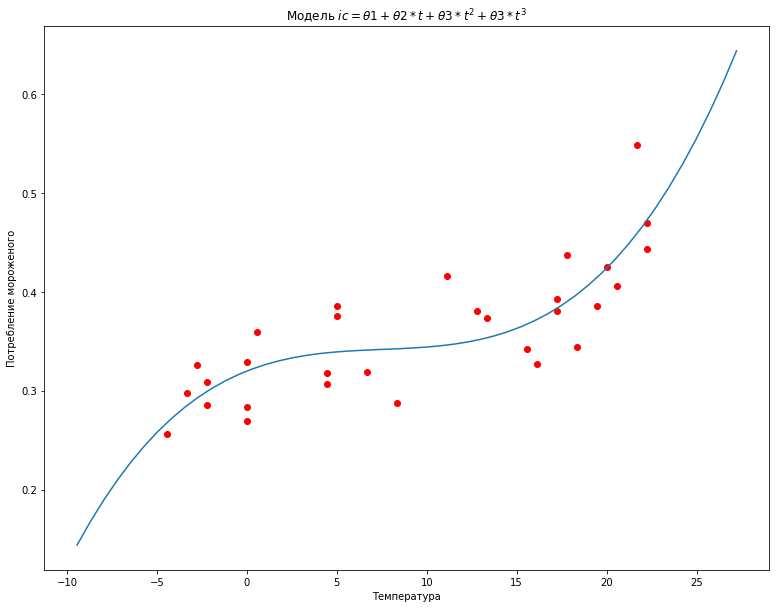

In [10]:
# график для модели ic = θ1 + θ2*t + θ3*t**2 + θ3*t**3
plt.figure(figsize=(13, 10))
plt.ylabel('Потребление мороженого')
plt.xlabel('Температура')
temperature_grid = np.linspace(temperature.min() - 5, temperature.max() + 5)
temperature_grid_predict = linear_regression.predict(np.column_stack(
    (np.ones_like(temperature_grid),
     temperature_grid,
     temperature_grid ** 2,
     temperature_grid ** 3)))
plt.plot(temperature_grid, temperature_grid_predict)
plt.scatter(temperature, ic, color='red')
plt.title(r'Модель $ic = θ1 + θ2*t + θ3*t^2 + θ3*t^3$')
plt.show()

Результат получился не очень хороший: хотя график регрессии довольно точно описывает описывает точки выборки, но вне них он как-то неправдоподобно быстро убывает/возрастает.

Чтобы понять, почему так происходит, выведите значения матрицы $(X^T X)^{-1}$ для данной матрицы и посчитайте для нее индекс обусловленности $\sqrt{\left.\lambda_{max}\right/\lambda_{min}}$, где $\lambda_{max}, \lambda_{min}$ --- максимальный и минимальный собственные значения матрицы $X^T X$. Собственные значения можно посчитать функцией <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.eigvals.html">`scipy.linalg.eigvals`</a>.

Прокомментируйте полученные результаты. Помочь в этом может следующая <a href="https://ru.wikipedia.org/wiki/%D0%A7%D0%B8%D1%81%D0%BB%D0%BE_%D0%BE%D0%B1%D1%83%D1%81%D0%BB%D0%BE%D0%B2%D0%BB%D0%B5%D0%BD%D0%BD%D0%BE%D1%81%D1%82%D0%B8">статья</a>.

In [11]:
# собственные значения
eigvals = scipy.linalg.eigvals(linear_regression.inv_of_xt_dot_x)
eigvals

array([  9.39587724e-02+0.j,   7.10180670e-03+0.j,   2.97693228e-05+0.j,
         1.41790261e-09+0.j])

In [12]:
# индекс обусловленности
# scipy.linalg.eigvals возвращает комплексные числа, однако мнимая часть у них равна нулю
condition_number = math.sqrt(eigvals.max().real / eigvals.min().real)
condition_number

8140.394748895996

Индекс обусловленности получился очень большой. Это плохо, так как свидетельствует о переобучении.

**Задача 2.** В данной задаче нужно реализовать функцию отбора признаков для линейной регрессии. Иначе говоря, пусть есть модель $y = \theta_1 x_1 + ... + \theta_k x_k$. Нужно определить, какие $\theta_j$ нужно положить равными нулю, чтобы качество полученной модели было максимальным.

Для этого имеющиеся данные нужно случайно разделить на две части --- обучение и тест (train и test). На первой части нужно обучить модель регресии, взяв некоторые из признаков, то есть рассмотреть модель $y = \theta_{j_1} x_{j_1} + ... + \theta_{j_s} x_{j_s}$. По второй части нужно посчитать ее качество --- среднеквадратичное отклонение (mean squared error) предсказания от истинного значения отклика, то есть величину
$$MSE = \sum\limits_{i \in test} \left(\widehat{y}(x_i) - Y_i\right)^2,$$
где $x_i = (x_{i,1}, ..., x_{i,k})$, $Y_i$ --- отклик на объекте $x_i$, а $\widehat{y}(x)$ --- оценка отклика на объекте $x$.

Если $k$ невелико, то подобным образом можно перебрать все поднаборы признаков и выбрать наилучший по значению MSE.

Для выполнения задания воспользуйтесь следующими функциями:
* <a href="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression">`sklearn.linear_model.LinearRegression`</a>
--- реализация линейной регрессии. В данной реализации свободный параметр $\theta_1$ по умолчанию автоматически включается в модель. Отключить это можно с помощью `fit_intercept=False`, но это не нужно. *В данной задаче требуется, чтобы вы воспользовались готовой реализацией линейной регрессии, а не своей. Ведь на практике важно уметь применять готовые реализации, а не писать их самостоятельно.*

* <a href="http://scikit-learn.org/0.16/modules/generated/sklearn.cross_validation.train_test_split.html">`sklearn.cross_validation.train_test_split`</a>
--- функция разбиения данных на train и test. Установите параметр `test_size=0.3`.

* <a href="http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html">`sklearn.metrics.mean_squared_error`</a>
--- реализация MSE.

Для перебора реализуйте функцию.

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.datasets import load_boston

In [14]:
def best_features(X_train, X_test, Y_train, Y_test):
    mses = []  # сюда записывайте значения MSE
    k = X_train.shape[1]

    for j in range(1, 2 ** k):  # номер набора признаков
        mask = np.array([j & (1 << s) for s in range(k)], dtype=bool)
        features_numbers = np.arange(k)[mask]  # набор признаков

        model = linear_model.LinearRegression().fit(X_train[:, features_numbers], Y_train)
        Y_test_predict = model.predict(X_test[:, features_numbers])
        mse = mean_squared_error(Y_test, Y_test_predict)  # MSE для данного набора признаков
        mses.append(mse)

    # Печать 10 лучших наборов
    print('mse\t features')
    mses = np.array(mses)
    best_numbres = np.argsort(mses)[:10]
    for j in best_numbres:
        mask = np.array([j & (1 << s) for s in range(k)], dtype=bool)
        features_numbers = np.arange(k)[mask]
        print('%.3f\t' % mses[j], features_numbers)

Примените реализованный отбор признаков к датасетам
* <a href="http://archive.ics.uci.edu/ml/datasets/Yacht+Hydrodynamics">Yacht Hydrodynamics</a> --- для парусных яхт нужно оценить остаточное сопротивление на единицу массы смещения (последний столбец) в зависимости от различных характеристик яхты.

* <a href="http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston">Boston Housing Prices</a> --- цены на дома в Бостоне в зависимости от ряда особенностей.

In [15]:
# Парусные яхты: остаточное сопротивление на единицу массы смещения в зависимости от различных характеристик яхты
data = np.loadtxt('yacht_hydrodynamics.data')
X = data[:, :-1]
Y = data[:, -1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
best_features(X_train, X_test, Y_train, Y_test)

mse	 features
73.952	 [0 5]
73.983	 [0 1 2 3 4]
74.118	 [0 3 5]
74.159	 [0 1 2 3 5]
74.166	 [0 4 5]
74.217	 [0 2 5]
74.230	 [0 1 5]
74.236	 [0 2 4 5]
74.236	 [0 1 4 5]
74.250	 [0 1 2 5]


При каждом запуске результаты отличаются, но почти всегда почти в каждый из десяти лучших наборов параметров входит пятый параметр (froude number), так что можно сделать вывод, что основной вклад в остаточное сопротивление вносит он.

In [16]:
# цены на дома в Бостоне в зависимости от ряда особенностей
X, Y = load_boston(return_X_y=True)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
best_features(X_train, X_test, Y_train, Y_test)

mse	 features
20.582	 [ 0  4  5  6  7  9 10 11]
20.624	 [ 0  4  5  6  7 10 11]
20.784	 [ 0  4  5  6  7  8 10 11]
20.820	 [ 0  1  2  3  5  6  7 10 11]
20.827	 [ 0  1  2  3  5  6  7  9 10 11]
20.948	 [ 0  3  4  5  6  7  9 10 11]
20.951	 [ 0  3  4  5  6  7 10 11]
20.974	 [ 0  1  2  3  5  6  7  8 10 11]
21.012	 [ 0  2  4  5  6  7  9 10 11]
21.057	 [ 0  3  4  5  6  7  8 10 11]


Мне кажется, что здесь основными параметрами являются 0, 4-8, 10 и 11.

**Задача 3<font size="5" color="red">\*</font>.** Загрузите <a href="http://people.sc.fsu.edu/~jburkardt/datasets/regression/x01.txt">датасет</a>, в котором показана зависимость веса мозга от веса туловища для некоторых видов млекопитающих. Задача состоит в том, чтобы подобрать по этим данным хорошую модель регрессии. Для этого, можно попробовать взять некоторые функции от значения веса туловища, например, степенную, показательную, логарифмическую. Можно также сделать преобразование значений веса мозга, например, прологарифмировать. Кроме того, можно разбить значения веса туловища на несколько частей и на каждой части строить свою модель линейной регрессии.

**Задача 4.** Пусть $X_1, ..., X_n$ --- выборка из распределения $\mathcal{N}(a, \sigma^2)$. Постройте точную доверительную область для параметра $\theta = (a, \sigma^2)$ уровня доверия $\alpha=0.95$ для сгенерированной выборки размера $n \in \{5, 20, 50\}$ из стандартного нормального распределения. Какой вывод можно сделать?

Рассматриваем линейную модель $X=Z \cdot a + \mathcal{E}$, где $Z$ --- столбец из n единиц, $\mathcal{E} \sim N(0, \sigma^2 \cdot E)$, E --- единичная матрица.

Доверительный интервал для $a$ нам посчитает класс LinearRegression. Доверительный интервал для $\sigma^2$ следующий: $(0, \frac{(n-1)\widehat\sigma^2}{z_{1-\alpha}})$, где $z_p$ --- p-квантиль распределения $\chi^2_{n-1}$. Чтобы получить точную доверительную область, возьмём доверительные интервалы для $a$ и $\sigma^2$ уровня доверия $\sqrt{0.95}$.

In [17]:
table = [['n', '', 'доверительный интервал для a', '', 'доверительный интервал для $\sigma^2$']]
sample = sps.norm.rvs(size=50)
for n in [5, 20, 50]:
    Y = sample[:n].T
    X = np.ones((n, 1))
    model = LinearRegression().fit(X, Y, alpha=1 - 0.05 / 2)
    доверительный_интервал_для_a = model.conf_int[0]
    доверительный_интервал_для_сигма2 = [0, (n - 1) * model.sigma_sq / sps.chi2(n - 1).ppf(math.sqrt(0.95))]
    line = (n, *доверительный_интервал_для_a, *доверительный_интервал_для_сигма2)
    table.append(line)
display(HTML(tabulate.tabulate(table, tablefmt='html')))

n,,доверительный интервал для a,,доверительный интервал для $\sigma^2$
5,-1.1579701459416536,1.8378740768227129,0,0.3305012604766111
20,-0.4358978187333934,0.5937868155041176,0,0.518515590292149
50,-0.15497826167903703,0.5085878218398473,0,0.7189616505379354


**Вывод:** при увеличении размера выборки доверительная область изменяет форму: по оси для $a$ она уменьшается, а по оси для $\sigma^2$ она увеличивается.

**Задача 5<font size="5" color="red">\*</font>.** 
Пусть дана линейная гауссовская модель $Y = X\theta + \varepsilon$, где $\varepsilon \sim \mathcal{N}(0, \beta^{-1}I_n)$.
Пусть $\theta$ имеет априорное распределение $\mathcal{N}(0, \alpha^{-1}I_k)$. 
Такая постановка задачи соответствует Ridge-регрессии.
Оценкой параметров будет математическое ожидание по апостериорному распределению, аналогично можно получить доверительный интервал.
Кроме того, с помощью апостериорного распределения можно получить доверительный интервал для отклика на новом объекте, а не только точечную оценку.

Реализуйте класс RidgeRegression подобно классу LinearRegression, но добавьте в него так же возможность получения доверительного интервала для отклика на новом объекте.
Примените модель к некоторых датасетам, которые рассматривались в предыдущих задачах.
Нарисуйте графики оценки отклика на новом объекте и доверительные интервалы для него.

## 2. Проверка статистических гипотез

**Задача 6.** 
Существует примета, что если перед вам дорогу перебегает черный кот, то скоро случится неудача. 
Вы же уже достаточно хорошо знаете статистику и хотите проверить данную примету. 
Сформулируем задачу на математическом языке. 
Пусть $X_1, ..., X_n \sim Bern(p)$ --- проведенные наблюдения, где $X_i = 1$, если в $i$-м испытании случилась неудача после того, как черный кот перебежал дорогу, а $p$ --- неизвестная вероятность такого события. 
Нужно проверить гипотезу $H_0: p=1/2$ (отсутствие связи между черным котом и неудачей) против альтернативы $H_1: p>1/2$ (неудача происходит чаще если черный кот перебегает дорогу).

Известно, что $S = \left\{T(X) > c_\alpha\right\}$, где $T(X) = \sum X_i$, является равномерно наиболее мощным критерием для данной задачи. 
Чему при этом равно $c_\alpha$?
При этом p-value в данной задаче определяется как $p(t) = \mathsf{P}_{0.5}(T(X) > t)$, где $t = \sum x_i$ --- реализация статистики $T(X)$.

Для начала проверьте, что критерий работает.
Возьмите несколько значений $n$ и реализаций статистики $T(X)$.
В каждом случае найдите значение $c_\alpha$ и p-value.
Оформите это в виде таблицы.

Пользуйтесь функциями из `scipy.stats`, про которые подробно написано в файле `python_5`. Внимательно проверьте правильность строгих и нестрогих знаков.

Если РНМК имеет вид $S=\{\sum X_i > c_\alpha\}$, то $c_\alpha$ это $(1-\alpha)$ квантиль распределения $Bin(n, \frac{1}{2})$.

In [18]:
def print_table(values, минимальное_значение_p_при_котором_не_отвергаем=0.5):
    table = [['n', 'p', '$\sum X_i$', r'$c_\alpha$', 'p-value', 'отвергаем?', 'должны отвергать?']]
    for n, p in values:
        sample = sps.bernoulli(p).rvs(n)
        t = sample.sum()
        c_alpha = sps.binom(n, 0.5).ppf(1 - 0.05)
        p_value = sps.binom(n, 0.5).sf(t)
        отвергаем = 'да' if t > c_alpha else 'нет'
        должны_отвергать = 'нет' if p <= минимальное_значение_p_при_котором_не_отвергаем else 'да'
        line = [n, p, t, c_alpha, '{:.3f}'.format(p_value), отвергаем, должны_отвергать]
        table.append(line)
    display(HTML(tabulate.tabulate(table, tablefmt='html')))

In [19]:
# проверка работоспособности критерия
ns = [10, 20, 50, 100]
ps = np.linspace(0.5, 1, 6)
values = [(n, p) for n in ns for p in ps]
print_table(values)

n,p,$\sum X_i$,$c_\alpha$,p-value,отвергаем?,должны отвергать?
10,0.5,6,8.0,0.172,нет,нет
10,0.6,6,8.0,0.172,нет,да
10,0.7,8,8.0,0.011,нет,да
10,0.8,8,8.0,0.011,нет,да
10,0.9,10,8.0,0.000,да,да
10,1.0,10,8.0,0.000,да,да
20,0.5,14,14.0,0.021,нет,нет
20,0.6,13,14.0,0.058,нет,да
20,0.7,12,14.0,0.132,нет,да
20,0.8,17,14.0,0.000,да,да


Видим, что критерий работает, причём чем больше размер выборки, тем лучше.

Для каких истинных значений $p$ с точки зрения практики можно считать, что связь между черным котом и неудачей есть? 
Теперь сгенерируйте 10 выборок для двух случаев: 1). $n=5, p=0.75$; 2). $n=10^5, p=0.51$. 
В каждом случае в виде таблицы выведите реализацию статистики $T(X)$, соответствующее p-value и 0/1 - отвергается ли $H_0$ (выводите 1, если отвергается).
Какие выводы можно сделать?

Мне кажется, что для $p>0.6$ можно считать, что связь есть.

In [20]:
values = [(5, 0.75)] * 10 + [(10 ** 5, 0.51)] * 10
print_table(values)

n,p,$\sum X_i$,$c_\alpha$,p-value,отвергаем?,должны отвергать?
5,0.75,2,4.0,0.500,нет,да
5,0.75,4,4.0,0.031,нет,да
5,0.75,3,4.0,0.188,нет,да
5,0.75,5,4.0,0.000,да,да
5,0.75,2,4.0,0.500,нет,да
5,0.75,5,4.0,0.000,да,да
5,0.75,2,4.0,0.500,нет,да
5,0.75,4,4.0,0.031,нет,да
5,0.75,3,4.0,0.188,нет,да
5,0.75,2,4.0,0.500,нет,да


При маленьких n и даже таком большом значении p, как 0.75 (то есть связь точно есть), почти всегда гипотеза $H_0$ не будет отвергаться, а при больших n и даже таком близком к 0.5 значении p, как 0.51 (то есть связи эффективно нет) почти всегда гипотеза $H_0$ будет отвергаться. В обоих случаях получается плохо.

Возникает задача подбора оптимального размера выборки.

Для этого сначала зафиксируйте значение $p^* > 1/2$, которое будет обладать следующим свойством.
Если истинное $p > p^*$, то такое отклонение от $1/2$ с практической точки зрения признается существенным, то есть действительно чаще случается неудача после того, как черный кот перебегает дорогу.
В противном случае отклонение с практической точки зрения признается несущественным.

Теперь для некоторых $n$ постройте графики функции мощности критерия при $1/2 < p < 1$ и уровне значимости 0.05.
Выберите такое $n^*$, для которого функция мощности дает значение 0.8 при $p^*$.
Для выбранного $n^*$ проведите эксперимент, аналогичный проведенным ранее экспериментам, сгенерировав выборки для следующих истинных значений $p$: 1). $1/2 < p < p^*$; 2). $p > p^*$.
Сделайте вывод.

Возьмём $p^*=0.6$.

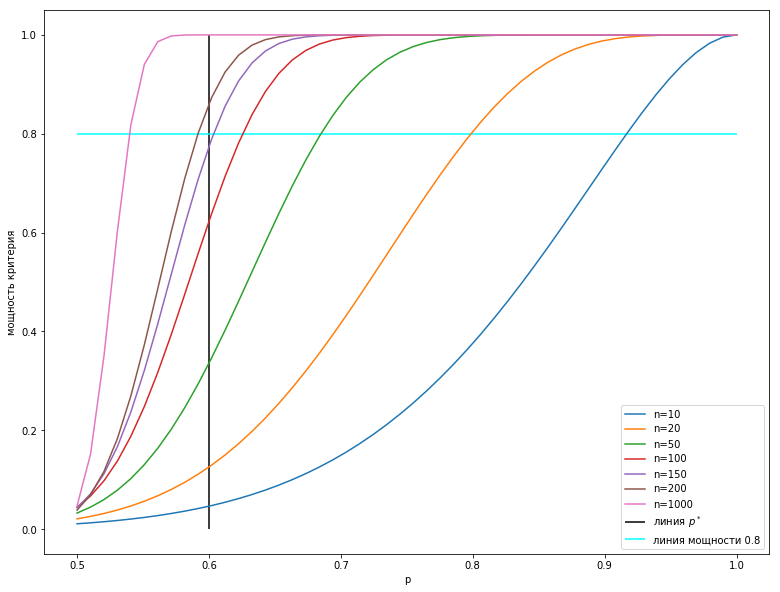

In [21]:
p0 = 0.6
plt.figure(figsize=(13, 10))
plt.xlabel('p')
plt.ylabel('мощность критерия')
for n in [10, 20, 50, 100, 150, 200, 1000]:
    c_alpha = sps.binom(n, 0.5).ppf(1 - 0.05)
    grid = np.linspace(0.5, 1)
    plt.plot(grid, sps.binom(n, grid).sf(c_alpha), label='n={}'.format(n))
plt.vlines(p0, 0, 1, label='линия $p^*$')
plt.hlines(0.8, 0.5, 1, color='cyan', label='линия мощности 0.8')
plt.legend()
plt.show()

Получаем оптимальный размер выборки $n^* \approx 150$

In [22]:
n0 = 150

In [23]:
# p < 0.6
ps = np.linspace(0.5, 0.59, 10)
values = [(n0, p) for p in ps]
print_table(values, p0)

n,p,$\sum X_i$,$c_\alpha$,p-value,отвергаем?,должны отвергать?
150,0.5,64,85.0,0.957,нет,нет
150,0.51,89,85.0,0.009,да,нет
150,0.52,79,85.0,0.231,нет,нет
150,0.53,86,85.0,0.030,да,нет
150,0.54,82,85.0,0.110,нет,нет
150,0.5499999999999999,84,85.0,0.060,нет,нет
150,0.5599999999999999,82,85.0,0.110,нет,нет
150,0.57,78,85.0,0.284,нет,нет
150,0.58,87,85.0,0.020,да,нет
150,0.59,69,85.0,0.815,нет,нет


In [24]:
# p > 0.6
ps = np.linspace(0.61, 1, 11)
values = [(n0, p) for p in ps]
print_table(values, p0)

n,p,$\sum X_i$,$c_\alpha$,p-value,отвергаем?,должны отвергать?
150,0.61,98,85.0,0.000,да,да
150,0.649,94,85.0,0.001,да,да
150,0.688,92,85.0,0.002,да,да
150,0.727,105,85.0,0.000,да,да
150,0.766,110,85.0,0.000,да,да
150,0.8049999999999999,113,85.0,0.000,да,да
150,0.844,127,85.0,0.000,да,да
150,0.883,129,85.0,0.000,да,да
150,0.9219999999999999,141,85.0,0.000,да,да
150,0.961,141,85.0,0.000,да,да


Мы подобрали оптимальный размер выборки (в предположении, что неудачи считаются значимыми, если имеют вероятность >0.6). Выборки этого размера с вероятностью неудачи >0.6 мы отклоняем почти всегда (это отлично). Выборки этого размера с вероятностью неудачи <0.6 мы отклоняем достаточно редко (это хорошо; в идеале вообще не отклонять, конечно).

### Справка для выполнения следующих задач

**Критерий согласия хи-квадрат**

<a href=https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html#scipy.stats.chisquare>`scipy.stats.chisquare`</a>`(f_obs, f_exp=None, ddof=0)`

`f_obs` --- число элементов выборки, попавших в каждый из интервалов

`f_exp` --- ожидаемое число элементов выборки (по умолчанию равномерное)

`ddof` --- поправка на число степеней свободы. Статистика асимптотически будет иметь распределение хи-квадрат с числом степеней свободы $k - 1 - ddof$, где $k$ --- число интервалов.

Возвращает значение статистики критерия и соответствующее p-value.

**Критерий согласия Колмогорова**

<a href=https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html#scipy.stats.kstest>`scipy.stats.kstest`</a>`(rvs, cdf, args=())`

`rvs` --- выборка

`cdf` --- функция распределения (сама функция или ее название)

`args` --- параметры распределения

Возвращает значение статистики критерия и соответствующее p-value.

**Задача 7.**

* Проверьте, что ваша выборка значений скорости ветра из задания 2 действительно согласуется с распределением Вейбулла.

* Проверьте, что при больших $n$ распределение статистики из задач 3 и 4 задания 2 действительно хорошо приближают предельное распределение.

* Проверьте, что остатки в регрессии из задач выше нормальны.

* Подберите класс распределений для выборки количества друзей из задания 1.

Использовать можно два описанных выше критерия, либо любой другой критерий, если будет обоснована необходимость его применения в данной задаче, а так же будет приведено краткое описание критерия.
Уровень значимости взять равным 0.05.

### Проверим, что выборка значений скорости ветра из задания 2 согласуется с распределением Вейбулла

In [25]:
sample = np.loadtxt('выборка_скорости_ветра_из_задания_2.txt')
shape, loc, scale = sps.weibull_min.fit(sample, floc=0)
shape, loc, scale

(2.053518804228502, 0, 2.7022591309142205)

Тогда с помощью поиска по сетке у нас получилась оценка максимального правдоподобия равная (2.053512, 2.702215), что до четвёртого знака совпадает с ОМП, полученной с помощью функции fit из scipy (это отлично).

In [26]:
kstatisics, pvalue = sps.kstest(sample, sps.weibull_min(shape, scale=scale).cdf)
kstatisics, pvalue

(0.065611569759784216, 0.086189646470045123)

Значение p-value больше 0.05, поэтому на уровне значимости 0.05 значения скорости ветра согласуются с распределением Вейбулла.

### Проверим, что при $n=200$ распределение статистики из задач 3 и 4 задания 2 действительно хорошо приближает предельное распределение

In [27]:
def check(distribution, estimator, true_distribution_of_T_j_n, distribution_name):
    number_samples = 200
    number_elements_in_sample = 300
    samples = distribution.rvs(size=(number_elements_in_sample, number_samples))
    estimates = estimator(samples)
    # зотим проверить, правда ли, что estimates --- выборка из распределения true_distribution_of_T_j_n
    kstatisics, pvalue = sps.kstest(estimates, true_distribution_of_T_j_n.cdf)
    print(distribution_name, kstatisics, pvalue)


def create_estimator(distribution_mean):
    def estimator(samples):
        # принимает массив выборок
        # для каждой выборки считает статистику: T = \sqrt{n} * (θ_n - θ),
        # где θ_n = (X_1 + ... + X_n) / n
        # n --- размер выборки (=300)
        n = samples.shape[1]
        estimates = samples.mean(axis=1)
        estimates = math.sqrt(n) * (estimates - distribution_mean)
        return estimates

    return estimator


def estimator(samples):
    # принимает массив выборок
    # для каждой выборки считает статистику: T = n * (θ - X_(n))
    # где θ=1
    n = samples.shape[1]
    return n * (1 - samples.max(axis=1))


check(sps.norm, create_estimator(0), sps.norm, 'normal ')
check(sps.poisson(1), create_estimator(1), sps.norm, 'poisson')
check(sps.uniform, estimator, sps.expon, 'uniform')

normal  0.0427007949384 0.651178270481
poisson 0.0818140111015 0.0340264157624
uniform 0.0656063775295 0.144610878603


Во всех трёх случаях значение p-value больше 0.05, поэтому мы не отвергаем гипотезу о том, что статистики из предельного распределения.

### Проверим, что остатки в регрессии из задач выше нормальны

In [28]:
for остаток, сигма_в_квадрате in остатки:
    kstatisics, pvalue = sps.kstest(остаток, sps.norm(0, math.sqrt(сигма_в_квадрате)).cdf)
    print(kstatisics, pvalue)

0.0979384890129 0.935785297459
0.111295882785 0.851331709221
0.136426343934 0.992317830794
0.159993161248 0.893356283789
0.191491719467 0.959538937513
0.100833706865 0.920499436456
0.0984919635098 0.933003116671
0.220586870295 0.968100434954
0.158576137546 0.661742365816
0.122907344924 0.407403543346


Во всех случаях значение p-value больше 0.05, поэтому мы не отвергаем гипотезу о том, что остатки распределены нормально.

### Подберём класс распределений для выборки количества друзей из задания 1

In [29]:
sample = np.loadtxt('выборка_числа_друзей_из_задания_1.csv')

#### Проверим, может эта выборка из нормального распределения:

In [30]:
kstatisics, pvalue = sps.kstest(sample, sps.norm(sample.mean(), sample.std()).cdf)
kstatisics, pvalue

(0.10340251386864796, 0.0086390853134150625)

p-value < 0.05, поэтому нормальное распределение не подходит.

#### Проверим, может эта выборка из распределения Парето. ОМП для параметра распределения Парето равно $\frac{n}{\sum log X_i}$

In [31]:
омп_для_парето = 1 / np.log(sample + 1).mean()
омп_для_парето

0.20008964581775351

In [32]:
kstatisics, pvalue = sps.kstest(sample + 1, sps.pareto(омп_для_парето).cdf)
kstatisics, pvalue

(0.44008436967312375, 0.0)

Тоже нет.

**Задача 8<font size="5" color="red">\*</font>.** Проведите исследование согласно примеру 2 параграфа 2 главы 18 книги М.Б. Лагутина "Наглядная математическая статистика".

**Задача 9<font size="5" color="red">\*</font>.** 
Изучите Q-Q plot и критерий Шапиро-Уилка для проверки нормальности, напишите их теоретическое пояснение.
В изучении могут помочь материалы курса <a href="http://wiki.cs.hse.ru/%D0%9F%D1%80%D0%B8%D0%BA%D0%BB%D0%B0%D0%B4%D0%BD%D0%BE%D0%B9_%D1%81%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B9_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85"> ПСАД</a>.

Постройте графики Q-Q plot для различных распределений и дайте к ним пояснение.
Проверьте различные данные на нормальность с помощью различных критериев и Q-Q plot.
Данные можно использовать из задачи 7 или какие-либо еще, например, отдельные компоненты из Ирисов Фишера.
Постарайтесь так же правильно контролировать вероятность общей ошибки первого рода.